In [1]:
import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures

# @title Figure Settings
import logging
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
# 
# fig_w, fig_h = 12, 4.5
# my_fontsize = 16
# my_params = {'axes.labelsize': my_fontsize,
#              'axes.titlesize': my_fontsize,
#              'figure.figsize': [fig_w, fig_h],
#              'font.size': my_fontsize,
#              'legend.fontsize': my_fontsize-4,
#              'lines.markersize': 8.,
#              'lines.linewidth': 2.,
#              'xtick.labelsize': my_fontsize-2,
#              'ytick.labelsize': my_fontsize-2}


In [2]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

def plot_functions(function, show_derivative, show_integral):
    # For sympy we first define our symbolic variable
    x, y, z, t, f = sp.symbols('x y z t f')

    # We define our function
    if function == 'Linear':
        f = -2*t
        name = r'$-2t$'
    elif function == 'Parabolic':
        f =  t**2
        name = r'$t^2$'
    elif function == 'Exponential':
        f =  sp.exp(t)
        name = r'$e^t$'
    elif function == 'Sine':
        f =  sp.sin(t)
        name = r'$sin(t)$'
    elif function == 'Sigmoid':
        f = 1/(1 + sp.exp(-(t-5)))
        name = r'$\frac{1}{1+e^{-(t-5)}}$'

    if show_derivative and not show_integral:
        # Calculate the derivative of sin(t) as a function of t
        diff_f = sp.diff(f)
        print('Derivative of', f, 'is ', diff_f)

        p1 = sp.plot(f, diff_f, show=False)
        p1[0].line_color='r'
        p1[1].line_color='b'
        p1[0].label='Function'
        p1[1].label='Derivative'
        p1.legend=True
        p1.title = 'Function = ' + name + '\n'
        p1.show()
    elif show_integral and not show_derivative:
        int_f = sp.integrate(f)
        int_f = int_f - int_f.subs(t, -10)
        print('Integral of', f, 'is ', int_f)

        p1 = sp.plot(f, int_f, show=False)
        p1[0].line_color='r'
        p1[1].line_color='g'
        p1[0].label='Function'
        p1[1].label='Integral'
        p1.legend=True
        p1.title = 'Function = ' + name + '\n'
        p1.show()


    elif show_integral and show_derivative:
        diff_f = sp.diff(f)
        print('Derivative of', f, 'is ', diff_f)

        int_f = sp.integrate(f)
        int_f = int_f - int_f.subs(t, -10)
        print('Integral of', f, 'is ', int_f)

        p1 = sp.plot(f, diff_f, int_f, show=False)
        p1[0].line_color='r'
        p1[1].line_color='b'
        p1[2].line_color='g'
        p1[0].label='Function'
        p1[1].label='Derivative'
        p1[2].label='Integral'
        p1.legend=True
        p1.title = 'Function = ' + name + '\n'
        p1.show()

    else:
        p1 = sp.plot(f, show=False)
        p1[0].line_color='r'
        p1[0].label='Function'
        p1.legend=True
        p1.title = 'Function = ' + name + '\n'
        p1.show()


def plot_alpha_func(t, f, df_dt):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t, f, 'r', label='Alpha function')
    plt.xlabel('Time (au)')
    plt.ylabel('Voltage')
    plt.title('Alpha function (f(t))')
    #plt.legend()

    plt.subplot(2,1,2)
    plt.plot(t, df_dt, 'b', label='Derivative')
    plt.title('Derivative of alpha function')
    plt.xlabel('Time (au)')
    plt.ylabel('df/dt')
    #plt.legend()


def plot_charge_transfer(t, PSP, numerical_integral):
    fig, axes = plt.subplots(1, 2)
    axes[0].plot(t, PSP)
    axes[0].set(xlabel = 't', ylabel = 'PSP')
    axes[1].plot(t, numerical_integral)
    axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

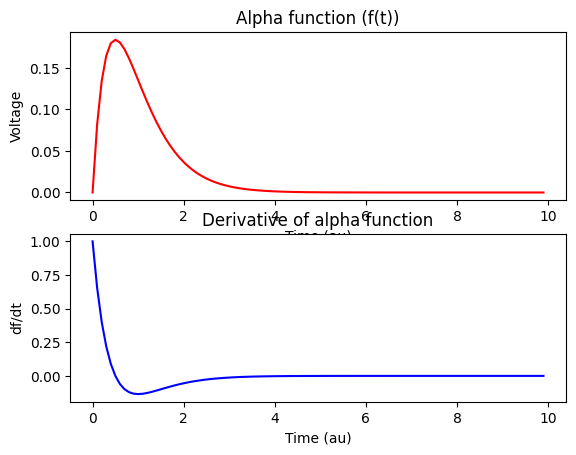

In [3]:
# Define time, time constant
t = np.arange(0, 10, .1)
tau = 0.5

# Compute alpha function
f = t * np.exp(-t/tau)

# Define u(t), v(t)
u_t = t
v_t = np.exp(-t/tau)

# Define du/dt, dv/dt
du_dt = 1 
dv_dt = -1 * (1/tau) * np.exp(-t / tau)

# Define full derivative
df_dt = u_t * dv_dt + v_t * du_dt

# Visualize
plot_alpha_func(t, f, df_dt)

In [4]:
f, t = sp.symbols('f, t')

# Function definition (sigmoid)
f = 1/(1 + sp.exp(-(t-5)))

# Get the derivative
diff_f = sp.diff(f)

# Print the resulting function
print('Derivative of', f, 'is ', diff_f)

Derivative of 1/(exp(5 - t) + 1) is  exp(5 - t)/(exp(5 - t) + 1)**2


In [5]:
# @markdown *Execute this cell to enable the widget.*
def numerical_derivative_demo(h = 0.2):
    # Now lets create a sequence of numbers which change according to the sine function
    dt = 0.01
    tx = np.arange(-10, 10, dt)
    sine_fun = np.sin(tx)

    # symbolic diffrentiation tells us that the derivative of sin(t) is cos(t)
    cos_fun = np.cos(tx)

    # Numerical derivative using difference formula
    n_tx = np.arange(-10,10,h) # create new time axis
    n_sine_fun = np.sin(n_tx) # calculate the sine function on the new time axis
    sine_diff = (n_sine_fun[1:] - n_sine_fun[0:-1]) / h

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.plot(tx, sine_fun, label='sine function')
    plt.plot(tx, cos_fun, label='analytical derivative of sine')

    # notice that numerical derivative will have one element less
    plt.plot(n_tx[0:-1], sine_diff, label='numerical derivative of sine')
    plt.xlim([-10, 10])
    plt.xlabel('Time (au)')
    plt.ylabel('f(x) or df(x)/dt')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=3, fancybox=True)
    plt.show()

_ = interact(numerical_derivative_demo, h = (0.01, 0.5, .02))

interactive(children=(FloatSlider(value=0.2, description='h', max=0.5, min=0.01, step=0.02), Output()), _dom_c…

In [6]:
def compute_rate_and_gain(I, a, theta, current_timestep):
    """ Compute rate and gain of neuron based on parameters
  
    Args:
      I (ndarray): different possible values of the current
      a (scalar): parameter of the transfer function
      theta (scalar): parameter of the transfer function
      current_timestep (scalar): the time we're using to take steps
  
    Returns:
      (ndarray, ndarray): rate and gain for each possible value of I
    """

    # Compute rate
    rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

    # Compute gain using a numerical derivative
    gain = (rate[1:] - rate[0:-1])/current_timestep

    return rate, gain

# @markdown Execute this cell to enable the widget

def plot_rate_and_gain(a, theta, I_mean):

    current_timestep = 0.1

    # Compute I
    I = np.arange(0, 8, current_timestep)

    rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)
    I_1 = I_mean - current_timestep/2
    rate_1 = (1+np.exp(-a*(I_1-theta)))**-1 - (1+np.exp(a*theta))**-1
    I_2 = I_mean + current_timestep/2
    rate_2 = (1+np.exp(-a*(I_2-theta)))**-1 - (1+np.exp(a*theta))**-1

    input_range = I_2-I_1
    output_range = rate_2 - rate_1

    # Visualize rate and gain
    plt.subplot(1,2,1)
    plt.plot(I,rate)
    plt.plot([I_1,I_1],[0, rate_1],color='r')
    plt.plot([0,I_1],[rate_1, rate_1],color='b')
    plt.plot([I_2,I_2],[0, rate_2],color='r')
    plt.plot([0,I_2],[rate_2, rate_2],color='b')
    plt.xlim([0, 8])
    low, high = plt.ylim()
    plt.ylim([0, high])

    plt.xlabel('Injected current (au)')
    plt.ylabel('Output firing rate (normalized)')
    plt.title('Transfer function')

    plt.text(2, 1.3, 'Output-Input Ratio =' + str(np.round(1000*output_range/input_range)/1000), style='italic',
             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    plt.subplot(1,2,2)
    plt.plot(I[0:-1], gain)
    plt.plot([I_mean, I_mean],[0,0.6],color='r')
    plt.xlabel('Injected current (au)')
    plt.ylabel('Gain')
    plt.title('Gain')
    plt.xlim([0, 8])
    low, high = plt.ylim()
    plt.ylim([0, high])

_ = widgets.interact(plot_rate_and_gain, a = (0.5, 2.0, .02), theta=(1.2,4.0,0.1), I_mean= (0.5,8.0,0.1))

interactive(children=(FloatSlider(value=1.24, description='a', max=2.0, min=0.5, step=0.02), FloatSlider(value…

In [7]:
@interact(f2d_string = 'x**2 + 2*x*y + y**2')
def plot_partial_derivs(f2d_string):
    f, x, y = sp.symbols('f, x, y')

    f2d = eval(f2d_string)
    f2d_dx = sp.diff(f2d,x)
    f2d_dy = sp.diff(f2d,y)

    print('Partial derivative of ', f2d, 'with respect to x is', f2d_dx)
    print('Partial derivative of ', f2d, 'with respect to y is', f2d_dy)

    p1 = sp.plotting.plot3d(f2d, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='f(x,y)',title='Our function')

    p2 = sp.plotting.plot3d(f2d_dx, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dx',title='Derivative w.r.t. x')

    p3 = sp.plotting.plot3d(f2d_dy, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dy',title='Derivative w.r.t. y')

interactive(children=(Text(value='x**2 + 2*x*y + y**2', description='f2d_string'), Output()), _dom_classes=('w…

In [ ]:
def riemann_sum_demo(dt = 0.5):
    step_size = 0.1
    min_val = 0.
    max_val = 10.
    tx = np.arange(min_val, max_val, step_size)

    # Our function
    ftn = tx**2 - tx + 1
    # And the integral analytical formula calculates using sympy
    int_ftn = tx**3/3 - tx**2/2 + tx

    # Numerical integration of f(t) using Riemann Sum
    n = int((max_val-min_val)/dt)
    r_tx = np.zeros(n)
    fun_value = np.zeros(n)
    for ii in range(n):
        a = min_val+ii*dt
        fun_value[ii] = a**2 - a + 1
        r_tx[ii] = a;

    # Riemann sum is just cumulative sum of the fun_value multiplied by the
    r_sum = np.cumsum(fun_value)*dt
    with plt.xkcd():
        plt.figure(figsize=(20,5))
        ax = plt.subplot(1,2,1)
        plt.plot(tx,ftn,label='Function')

        for ii in range(n):
            plt.plot([r_tx[ii], r_tx[ii], r_tx[ii]+dt, r_tx[ii]+dt], [0, fun_value[ii], fun_value[ii], 0] ,color='r')

        plt.xlabel('Time (au)')
        plt.ylabel('f(t)')
        plt.title('f(t)')
        plt.grid()

        plt.subplot(1,2,2)
        plt.plot(tx,int_ftn,label='Analytical')
        plt.plot(r_tx+dt,r_sum,color = 'r',label='Riemann Sum')
        plt.xlabel('Time (au)')
        plt.ylabel('int(f(t))')
        plt.title('Integral of f(t)')
        plt.grid()
        plt.legend()
        plt.show()


_ = widgets.interact(riemann_sum_demo, dt = (0.1, 1., .02))

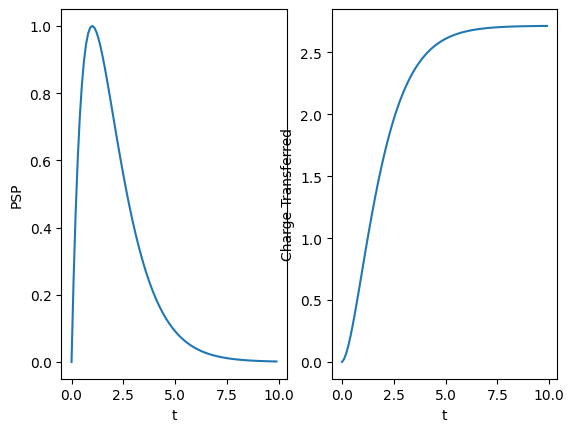

In [12]:
# Set up parameters
J = 1
tau_s = 1
t_sp = 1
dt = .1
t = np.arange(0, 10, dt)

# Code PSP formula
PSP = J * t * np.exp(-1 * (t - tau_s) / t_sp) 

# Compute numerical integral
# We already have PSP at every time step (height of rectangles). We need to
#.  multiply by width of rectangles (dt) to get areas
rectangle_areas = PSP * dt

# Cumulatively sum rectangles (hint: use np.cumsum)
numerical_integral = np.cumsum(rectangle_areas)

# Visualize
plot_charge_transfer(t, PSP, numerical_integral)